In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for graph measures
import bct

# statistics
from scipy.stats import spearmanr, pearsonr

plt.rcParams.update({'font.size': 14})

# Investigating the effect of specific lesions

To estimate the importance of nodes in the entwork, we lesion them one by one and calculate the memory capacity. This memory capacity can then be evaluated relative to the memory capacity of a fully intact model. This experiment is run on the HPC. The code to run this experiment can be found in "Lesion_single_node.py"

The input and output nodes are excluded from the choice of lesioned nodes. To avoid a bias in the results based on the choice of input or output nodes, these are chosen differently for each run, leading to 12 combinations of input and output nodes. Here, the number of input and output nodes changes depending on the Yeo resting state network that is chosen as an input / output.

The possible input nodes are:
Thalamic (2) - Subcortical regions (15) - Dorsal Attention (58) - Ventral Attention (130) - Limbic system (101) - Default Mode Network (277)

The possible output nodes are:
Visual cortex (151) - Somatomotor cortex (219)

In [2]:
# Loading all matrices containing the percentual loss/gain in MC

subctx_VIS = pd.read_csv("objective2/SingleNode_subctx.csv")
DA_VIS = pd.read_csv("objective2/SingleNode_DA.csv")
VA_VIS = pd.read_csv("objective2/SingleNode_VA.csv")
LIM_VIS = pd.read_csv("objective2/SingleNode_LIM.csv")
DMN_VIS = pd.read_csv("objective2/SingleNode_DMN.csv")
thalamic_VIS = pd.read_csv("objective2/SingleNode_thalamic.csv")

subctx_SM = pd.read_csv("objective2/SingleNode_subctx_SM.csv")
DA_SM = pd.read_csv("objective2/SingleNode_DA_SM.csv")
VA_SM = pd.read_csv("objective2/SingleNode_VA_SM.csv")
LIM_SM = pd.read_csv("objective2/SingleNode_LIM_SM.csv")
DMN_SM = pd.read_csv("objective2/SingleNode_DMN_SM.csv")
thalamic_SM = pd.read_csv("objective2/SingleNode_thalamic_SM.csv")

In [3]:
total = pd.concat([subctx_VIS, DA_VIS, VA_VIS, LIM_VIS, DMN_VIS, thalamic_VIS, subctx_SM, DA_SM, VA_SM, LIM_SM, DMN_SM, thalamic_SM], ignore_index=True)

In [4]:
mean = total.groupby("n_lesions")["MC_%"].mean().reset_index()

## Graph measures

The graph measures that are taken into account are node based. We make a table of the correlation coefficients.

In [5]:
w = np.load("data/human/consensus_0.npy")

### Degree

In [6]:
degree = bct.degrees_und(w)

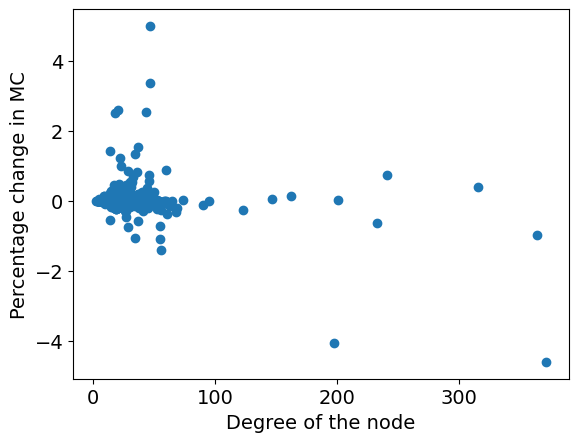

In [7]:
# Visualise the relationship
plt.scatter(degree[mean.n_lesions], mean["MC_%"].values)
plt.ylabel("Percentage change in MC")
plt.xlabel("Degree of the node")
plt.show()

Can we find a relationship?

In [8]:
print("Spearman correlation: ", spearmanr(degree[mean.n_lesions], mean["MC_%"].values))

Spearman correlation:  SignificanceResult(statistic=0.09693025217562999, pvalue=0.001990914761325412)


### Clustering coefficient

In [9]:
clustering = bct.clustering_coef_wu(w)

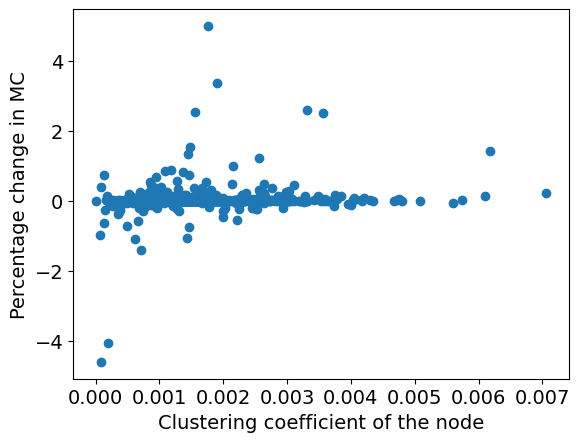

In [10]:
# Visualise the relationship
plt.scatter(clustering[mean.n_lesions], mean["MC_%"].values)
plt.ylabel("Percentage change in MC")
plt.xlabel("Clustering coefficient of the node")
plt.show()

In [11]:
print("Spearman correlation: ", spearmanr(clustering[mean.n_lesions], mean["MC_%"].values))

Spearman correlation:  SignificanceResult(statistic=0.20609192495092366, pvalue=3.377524878900775e-11)


#### Within module z-score

In [12]:
M, _ = bct.community_louvain(w)
z_score = bct.module_degree_zscore(w, M)

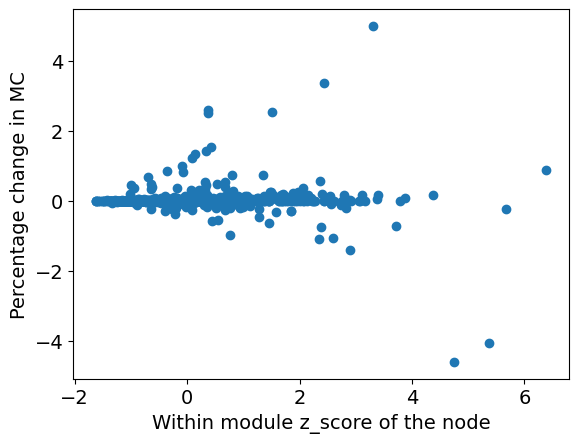

In [13]:
# Visualise the relationship
plt.scatter(z_score[mean.n_lesions], mean["MC_%"].values)
plt.ylabel("Percentage change in MC")
plt.xlabel("Within module z_score of the node")
plt.show()

In [14]:
print("Spearman correlation: ", spearmanr(z_score[mean.n_lesions], mean["MC_%"].values))

Spearman correlation:  SignificanceResult(statistic=0.09996534303850663, pvalue=0.0014283079547644257)


### Participation coefficient

In [15]:
M, _ = bct.community_louvain(w)
participation = bct.participation_coef(w, M)

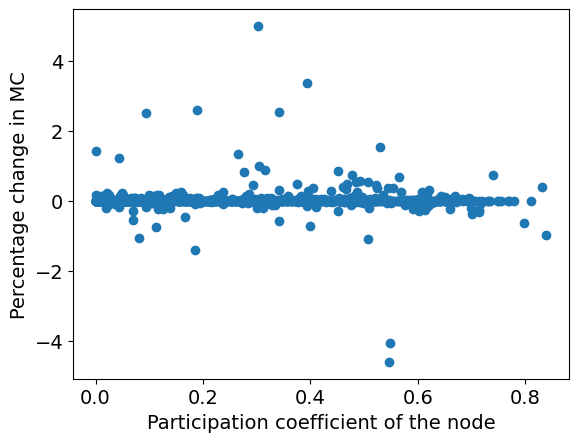

In [16]:
# Visualise the relationship
plt.scatter(participation[mean.n_lesions], mean["MC_%"].values)
plt.ylabel("Percentage change in MC")
plt.xlabel("Participation coefficient of the node")
plt.show()

In [17]:
print("Spearman correlation: ", spearmanr(participation[mean.n_lesions], mean["MC_%"].values))

Spearman correlation:  SignificanceResult(statistic=0.17966761141551862, pvalue=8.216579706665933e-09)


### Visualisation

In [18]:
def plot_MC(MC, coords):
    # Choose colormap with good resolution
    cmap = plt.cm.coolwarm

    vmin = np.min(MC)
    vmax = np.max(MC)

    fig, axs = plt.subplots(figsize=(8, 5))

    sc = axs.scatter(coords[:, 0], coords[:, 2], c=MC, cmap=cmap, s=20, vmin=vmin, vmax=vmax)

    cbar = plt.colorbar(sc, ax=axs, orientation="vertical")
    cbar.set_ticks(np.linspace(vmin, vmax, 5))

    axs.axis("off")
    plt.show(fig)

We can visualise the mean change over all choices of input and output nodes.

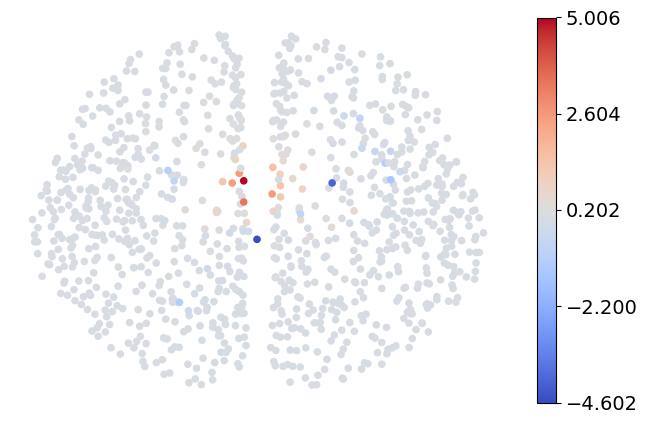

In [19]:
COORDS = np.load("data/human/coords.npy")
plot_MC(mean["MC_%"], COORDS[mean["n_lesions"]])

We can also visualise a specific choice. Here, the thalamic region was chosen as an input. We can then also visualise the input and output nodes.

In [20]:
def plot_input_output(MC, coords, input_nodes, output_nodes):
    # Define the colormap
    cmap = plt.cm.coolwarm

    vmin = np.min(MC)
    vmax = np.max(MC)

    fig, ax = plt.subplots(figsize = (8, 5))

    sc = ax.scatter(coords[:, 0], coords[:, 2], c=MC, cmap=cmap, s=20, vmin=vmin, vmax=vmax)

    ax.scatter(input_nodes[:, 0], input_nodes[:, 2], facecolors="white", edgecolors="black", s=15, linewidth=0.8, label="Input Nodes")
    ax.scatter(output_nodes[:, 0], output_nodes[:, 2], facecolors="grey", edgecolors="black", s=15, linewidth=0.8, label="Output Nodes")

    cbar = plt.colorbar(sc, ax=ax, orientation="vertical")
    cbar.set_ticks(np.linspace(vmin, vmax, 5))

    ax.axis("off")
    ax.legend(loc="upper right", bbox_to_anchor=(0.1, 1), borderaxespad=0)
    plt.show(fig)

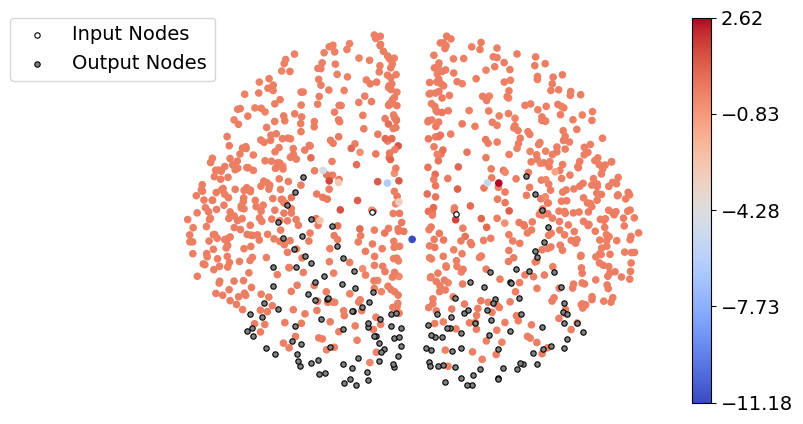

In [21]:
COORDS = np.load("data/human/coords.npy")
MAPPING = np.load("data/human/rsn_mapping.npy")

# For the thalamic region with visual output
input_nodes = [501, 1007]
output_nodes = np.argwhere(MAPPING == "VIS").flatten()
# output_nodes = []

plot_input_output(thalamic_VIS["MC_%"], COORDS[thalamic_VIS["n_lesions"]], COORDS[input_nodes], COORDS[output_nodes])

### Distance based measures

We can calculate the graph distance (number of edges between 2 nodes) between each pair of nodes in the matrix.

In [22]:
# Calculate hops
SPL, hops, pmat = bct.distance_wei_floyd(w, transform="inv")

Now, for each measurement of MC_%, we can calculate the distance of that node to the input nodes.

In [23]:
# subctx
subctx = np.argwhere(MAPPING == "subctx").flatten()
selection = hops[np.ix_(subctx_VIS.n_lesions, subctx)]
subctx_VIS["distance_input"] = np.min(selection, axis=1)
selection = hops[np.ix_(subctx_SM.n_lesions, subctx)]
subctx_SM["distance_input"] = np.min(selection, axis=1)

# Dorsal attention
DA = np.argwhere(MAPPING == "DA").flatten()
selection = hops[np.ix_(DA_VIS.n_lesions, DA)]
DA_VIS["distance_input"] = np.min(selection, axis=1)
selection = hops[np.ix_(DA_SM.n_lesions, DA)]
DA_SM["distance_input"] = np.min(selection, axis=1)

# Ventral attention
VA = np.argwhere(MAPPING == "VA").flatten()
selection = hops[np.ix_(VA_VIS.n_lesions, VA)]
VA_VIS["distance_input"] = np.min(selection, axis=1)
selection = hops[np.ix_(VA_SM.n_lesions, VA)]
VA_SM["distance_input"] = np.min(selection, axis=1)

# Limbic systems
LIM = np.argwhere(MAPPING == "LIM").flatten()
selection = hops[np.ix_(LIM_VIS.n_lesions, LIM)]
LIM_VIS["distance_input"] = np.min(selection, axis=1)
selection = hops[np.ix_(LIM_SM.n_lesions, LIM)]
LIM_SM["distance_input"] = np.min(selection, axis=1)

# Default Mode Network
DMN = np.argwhere(MAPPING == "DMN").flatten()
selection = hops[np.ix_(DMN_VIS.n_lesions, DMN)]
DMN_VIS["distance_input"] = np.min(selection, axis=1)
selection = hops[np.ix_(DMN_SM.n_lesions, DMN)]
DMN_SM["distance_input"] = np.min(selection, axis=1)

# thalamic
thalamic = [501, 1007]
selection = hops[np.ix_(thalamic_VIS.n_lesions, thalamic)]
thalamic_VIS["distance_input"] = np.min(selection, axis=1)
selection = hops[np.ix_(thalamic_SM.n_lesions, thalamic)]
thalamic_SM["distance_input"] = np.min(selection, axis=1)

In [24]:
total = pd.concat([subctx_VIS, DA_VIS, VA_VIS, LIM_VIS, DMN_VIS, thalamic_VIS, subctx_SM, DA_SM, VA_SM, LIM_SM, DMN_SM, thalamic_SM], ignore_index=True)

In [25]:
mean = total.groupby("n_lesions").mean().reset_index()

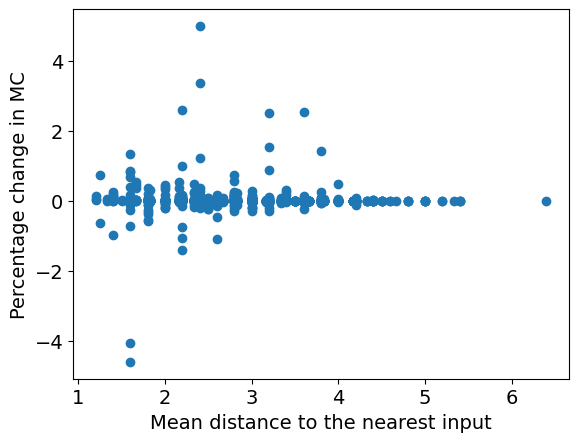

In [26]:
# Visualise the relationship
plt.scatter(mean.distance_input.values, mean["MC_%"].values)
plt.ylabel("Percentage change in MC")
plt.xlabel("Mean distance to the nearest input")
plt.show()

In [27]:
print("Spearman correlation: ", spearmanr(mean.distance_input.values, mean["MC_%"].values))

Spearman correlation:  SignificanceResult(statistic=-0.2567475179426516, pvalue=9.624043755804436e-17)


We can do the exact same thing for the distance to the output nodes.

In [28]:
# Visual
VIS = np.argwhere(MAPPING == "VIS").flatten()

selection = hops[np.ix_(subctx_VIS.n_lesions, VIS)]
subctx_VIS["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(DA_VIS.n_lesions, VIS)]
DA_VIS["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(VA_VIS.n_lesions, VIS)]
VA_VIS["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(LIM_VIS.n_lesions, VIS)]
LIM_VIS["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(DMN_VIS.n_lesions, VIS)]
DMN_VIS["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(thalamic_VIS.n_lesions, VIS)]
thalamic_VIS["distance_output"] = np.min(selection, axis=1)

# Somatosensory
SM = np.argwhere(MAPPING == "SM").flatten()

selection = hops[np.ix_(subctx_SM.n_lesions, SM)]
subctx_SM["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(DA_SM.n_lesions, SM)]
DA_SM["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(VA_SM.n_lesions, SM)]
VA_SM["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(LIM_SM.n_lesions, SM)]
LIM_SM["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(DMN_SM.n_lesions, SM)]
DMN_SM["distance_output"] = np.min(selection, axis=1)

selection = hops[np.ix_(thalamic_SM.n_lesions, SM)]
thalamic_SM["distance_output"] = np.min(selection, axis=1)

In [29]:
total = pd.concat([subctx_VIS, DA_VIS, VA_VIS, LIM_VIS, DMN_VIS, thalamic_VIS, subctx_SM, DA_SM, VA_SM, LIM_SM, DMN_SM, thalamic_SM], ignore_index=True)

In [30]:
mean = total.groupby("n_lesions").mean().reset_index()

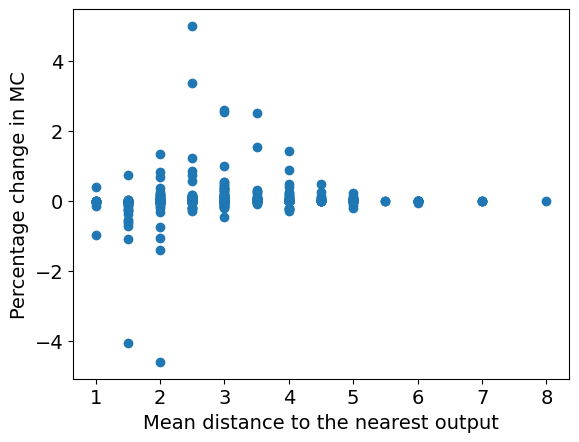

In [31]:
# Visualise the relationship
plt.scatter(mean.distance_output.values, mean["MC_%"].values)
plt.ylabel("Percentage change in MC")
plt.xlabel("Mean distance to the nearest output")
plt.show()

In [32]:
print("Spearman correlation: ", spearmanr(mean.distance_output.values, mean["MC_%"].values))

Spearman correlation:  SignificanceResult(statistic=0.06971592075144684, pvalue=0.026347578055667193)


## References

[1] Falandays, J.B., Yoshimi, J., Warren, W.H. et al. A potential mechanism for Gibsonian resonance: behavioral entrainment emerges from local homeostasis in an unsupervised reservoir network. Cogn Neurodyn 18, 1811–1834 (2024). https://doi.org/10.1007/s11571-023-09988-2

[2] Iacob S, Dambre J. Exploiting Signal Propagation Delays to Match Task Memory Requirements in Reservoir Computing. Biomimetics (Basel). 2024 Jun 14;9(6):355. doi: 10.3390/biomimetics9060355. PMID: 38921237; PMCID: PMC11201534.

[3] Suárez, L.E., Mihalik, A., Milisav, F. et al. Connectome-based reservoir computing with the conn2res toolbox. Nat Commun 15, 656 (2024). https://doi.org/10.1038/s41467-024-44900-4